In [145]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [146]:
import requests
import zipfile
import os

# # URL of the file to download
# url = 'https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip'
# # Path to save the downloaded zip file
# zip_path = '/Users/apple/Documents/file hafiz/course/Data Science/messy_vs_clean_room.zip'

# # Download the file
# response = requests.get(url)
# with open(zip_path, 'wb') as f:
#     f.write(response.content)

# # melakukan ekstraksi pada file zip
# local_zip = '/Users/apple/Documents/file hafiz/course/Data Science/messy_vs_clean_room.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/Users/apple/Documents/file hafiz/course/Data Science/data_samples')
# zip_ref.close()
 
base_dir = '../../data_samples/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [147]:
import os
os.listdir('../../data_samples/images/train')
os.listdir('../../data_samples/images/val')


['messy', 'clean']

In [148]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [149]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size = 32,
    class_mode ='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size = 32,
    class_mode ='binary'
    )


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20


2024-06-22 07:42:10.295916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 9s - 350ms/step - accuracy: 0.5000 - loss: 0.8195 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 2/20


2024-06-22 07:42:10.752621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:16.526405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 6s - 241ms/step - accuracy: 0.5469 - loss: 0.6774 - val_accuracy: 0.5000 - val_loss: 0.7273
Epoch 3/20


2024-06-22 07:42:16.770684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:22.666335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 6s - 246ms/step - accuracy: 0.6458 - loss: 0.6426 - val_accuracy: 0.5500 - val_loss: 0.8253
Epoch 4/20


2024-06-22 07:42:22.920569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:32.281466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 10s - 389ms/step - accuracy: 0.6146 - loss: 0.6620 - val_accuracy: 0.5500 - val_loss: 0.6552
Epoch 5/20


2024-06-22 07:42:32.651333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:40.176565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 8s - 314ms/step - accuracy: 0.6667 - loss: 0.6254 - val_accuracy: 0.7000 - val_loss: 0.5747
Epoch 6/20


2024-06-22 07:42:40.501701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:48.563538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 9s - 341ms/step - accuracy: 0.6510 - loss: 0.6016 - val_accuracy: 0.5500 - val_loss: 0.6842
Epoch 7/20


2024-06-22 07:42:49.026032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:42:56.249819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 8s - 302ms/step - accuracy: 0.8021 - loss: 0.5294 - val_accuracy: 0.8000 - val_loss: 0.4593
Epoch 8/20


2024-06-22 07:42:56.586350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 8s - 323ms/step - accuracy: 0.7448 - loss: 0.5486 - val_accuracy: 0.5500 - val_loss: 0.7462
Epoch 9/20


2024-06-22 07:43:04.495693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:04.660652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:10.090901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 6s - 228ms/step - accuracy: 0.7188 - loss: 0.6044 - val_accuracy: 0.6500 - val_loss: 0.5777
Epoch 10/20


2024-06-22 07:43:10.361674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:16.584633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 6s - 259ms/step - accuracy: 0.6927 - loss: 0.6220 - val_accuracy: 0.5500 - val_loss: 0.5970
Epoch 11/20


2024-06-22 07:43:16.807648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:23.549470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 7s - 282ms/step - accuracy: 0.7083 - loss: 0.5752 - val_accuracy: 0.5500 - val_loss: 0.5914
Epoch 12/20


2024-06-22 07:43:23.894125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:31.548211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 9s - 363ms/step - accuracy: 0.7604 - loss: 0.5226 - val_accuracy: 0.8000 - val_loss: 0.4229
Epoch 13/20


2024-06-22 07:43:32.976612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:37.956038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 5s - 208ms/step - accuracy: 0.8021 - loss: 0.4767 - val_accuracy: 0.8000 - val_loss: 0.3478
Epoch 14/20


2024-06-22 07:43:38.174061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 5s - 204ms/step - accuracy: 0.7708 - loss: 0.4825 - val_accuracy: 0.6000 - val_loss: 0.7970
Epoch 15/20


2024-06-22 07:43:43.117765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:43.271538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 7s - 297ms/step - accuracy: 0.7240 - loss: 0.5089 - val_accuracy: 0.8500 - val_loss: 0.3778
Epoch 16/20


2024-06-22 07:43:50.505392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:50.697877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:43:58.095835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 8s - 307ms/step - accuracy: 0.7656 - loss: 0.4767 - val_accuracy: 0.7500 - val_loss: 0.5056
Epoch 17/20


2024-06-22 07:43:58.372909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:44:03.450871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 5s - 215ms/step - accuracy: 0.7917 - loss: 0.4631 - val_accuracy: 0.7500 - val_loss: 0.4325
Epoch 18/20


2024-06-22 07:44:03.742249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:44:09.177659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 6s - 226ms/step - accuracy: 0.7656 - loss: 0.4730 - val_accuracy: 0.8500 - val_loss: 0.3400
Epoch 19/20


2024-06-22 07:44:09.414863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 5s - 202ms/step - accuracy: 0.8177 - loss: 0.4384 - val_accuracy: 0.6000 - val_loss: 0.7289
Epoch 20/20


2024-06-22 07:44:14.329910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:44:14.482319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 5s - 203ms/step - accuracy: 0.8385 - loss: 0.4037 - val_accuracy: 0.8500 - val_loss: 0.3198


2024-06-22 07:44:19.407650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-22 07:44:19.562410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
clean
/Users/apple/Documents/file hafiz/course/Data Science/data_samples/images/test/1.png


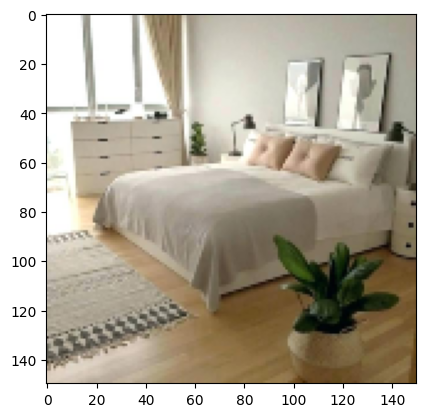

In [162]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk  # for image display (optional)
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def upload_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # File dialog to select a file
    file_path = filedialog.askopenfilename()

    # Print uploaded file path
    # print(f"Uploaded file path: {file_path}")
    return file_path

def image_classifier(path_img):
        img = image.load_img(path_img, target_size=(150,150)) 
        imgplot = plt.imshow(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        
        classes = model.predict(images, batch_size=10)  
        # print(fn)
        if classes==0:
            print('clean')
        else:
            print('messy')

# Call the function to upload file
path = upload_file()
image_classifier(path)
print(path)
